In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, SimpleRNN

C:\Users\milin\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### A) Create a dataset of 10,000 samples with 51 time steps each (Note: the 51st time step should beused as the label)

In [2]:
def generate_time_series(sample_size,n_steps):
    freq1,freq2,offset1,offset2 = np.random.rand(4,sample_size,1)
    time = np.linspace(0,1,n_steps)
    series = 0.5*np.sin((time-offset1)*(freq1*10+10))  #wave1
    series+= 0.2*np.sin((time-offset2)*(freq2*20+20))   #wave2
    series+= 0.1*(np.random.rand(sample_size,n_steps)-0.5) #noise
    return series[..., np.newaxis].astype(np.float32)  #[...,np.newaxis] adds an axis at the end of the series 1-D array to make it a 2-D array of 1 column


### B) Split the dataset in the ratio training: validation: testing = 70:20:10.

In [3]:
sample_size=10000
n_steps=51
series = generate_time_series(sample_size,n_steps)

X = series[:,:50,:]
y = series[:,-1,:]

train_split = 7000
validation_split = 2000

X_train,X_val,X_test = X[:train_split],X[train_split:train_split+validation_split],X[train_split+validation_split:]
y_train,y_val,y_test = y[:train_split],y[train_split:train_split+validation_split],y[train_split+validation_split:]

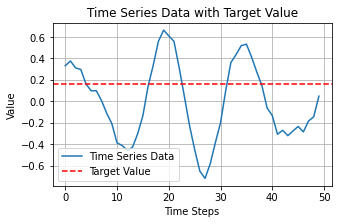

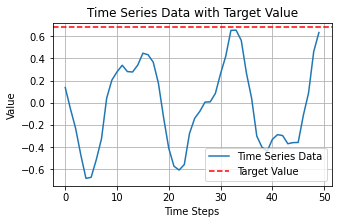

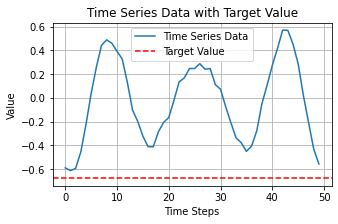

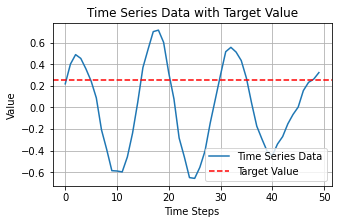

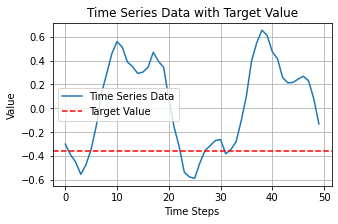

In [27]:
#plot the time series data to visualise it
for i in range(0,5):
    sample_index = i

    # Extract the time series data for the chosen sample
    time_series_data = X[sample_index, :, 0]  # Shape: (50,)

    # Extract the corresponding target value
    target_value = y[sample_index, 0]  # Shape: (1,)

    # Create a time array for the x-axis
    time_steps = np.arange(len(time_series_data))

    # Plot the time series data
    plt.figure(figsize=(5, 3))
    plt.plot(time_steps, time_series_data, label='Time Series Data')
    plt.axhline(y=target_value, color='red', linestyle='--', label='Target Value')
    plt.xlabel('Time Steps')
    plt.ylabel('Value')
    plt.title('Time Series Data with Target Value')
    plt.legend()
    plt.grid(True)
    plt.show()


### a. Fully connected neural network.

In [4]:
fcnn_model = Sequential([
    Flatten(input_shape=(50,1)),
    Dense(1)
]
)

In [28]:
fcnn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=["mean_absolute_error"])

In [30]:
history1=fcnn_model.fit(X_train,y_train,epochs=10,validation_data=(X_val,y_val))

Epoch 1/10
219/219 [==============================] - 0s 851us/step - loss: 0.0038 - mean_absolute_error: 0.0495 - val_loss: 0.0038 - val_mean_absolute_error: 0.0494
Epoch 2/10
219/219 [==============================] - 0s 754us/step - loss: 0.0038 - mean_absolute_error: 0.0491 - val_loss: 0.0038 - val_mean_absolute_error: 0.0491
Epoch 3/10
219/219 [==============================] - 0s 760us/step - loss: 0.0037 - mean_absolute_error: 0.0485 - val_loss: 0.0036 - val_mean_absolute_error: 0.0484
Epoch 4/10
219/219 [==============================] - 0s 757us/step - loss: 0.0036 - mean_absolute_error: 0.0481 - val_loss: 0.0036 - val_mean_absolute_error: 0.0482
Epoch 5/10
219/219 [==============================] - 0s 780us/step - loss: 0.0036 - mean_absolute_error: 0.0479 - val_loss: 0.0035 - val_mean_absolute_error: 0.0477
Epoch 6/10
219/219 [==============================] - 0s 794us/step - loss: 0.0035 - mean_absolute_error: 0.0477 - val_loss: 0.0035 - val_mean_absolute_error: 0.0475
Epoc

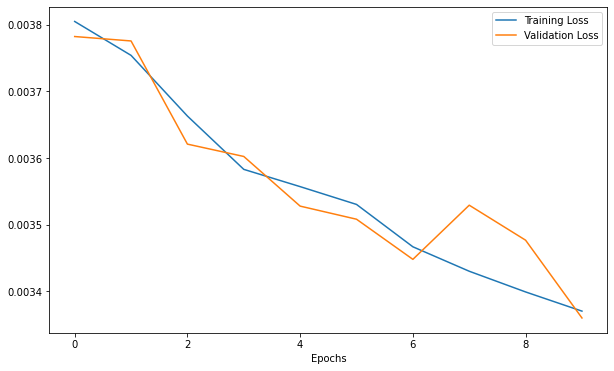

In [31]:
loss = history1.history['loss']
val_loss = history1.history['val_loss']
plt.figure(figsize=(10,6))
epochs = range(0,10)
plt.plot(epochs,loss,label='Training Loss')
plt.plot(epochs,val_loss,label='Validation Loss')
plt.xlabel('Epochs')
plt.legend()

## b. Simple RNN with one layer (output layer)  

In [32]:
model_rnn1 = Sequential([
    SimpleRNN(20,return_sequences=True,input_shape=[None,1]),
    Dense(1)
])
model_rnn1.compile(optimizer='adam',loss='mean_squared_error',metrics=[tf.keras.metrics.mean_absolute_percentage_error])

In [33]:
history2 = model_rnn1.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
219/219 [==============================] - 1s 4ms/step - loss: 0.1454 - mean_absolute_percentage_error: 144.2960 - val_loss: 0.1460 - val_mean_absolute_percentage_error: 121.2283
Epoch 2/10
219/219 [==============================] - 1s 3ms/step - loss: 0.1429 - mean_absolute_percentage_error: 133.6635 - val_loss: 0.1453 - val_mean_absolute_percentage_error: 135.2153
Epoch 3/10
219/219 [==============================] - 1s 3ms/step - loss: 0.1430 - mean_absolute_percentage_error: 136.3632 - val_loss: 0.1456 - val_mean_absolute_percentage_error: 123.6364
Epoch 4/10
219/219 [==============================] - 1s 3ms/step - loss: 0.1425 - mean_absolute_percentage_error: 137.6753 - val_loss: 0.1444 - val_mean_absolute_percentage_error: 134.1723
Epoch 5/10
219/219 [==============================] - 1s 3ms/step - loss: 0.1379 - mean_absolute_percentage_error: 163.1207 - val_loss: 0.1506 - val_mean_absolute_percentage_error: 185.8524
Epoch 6/10
219/219 [==============================

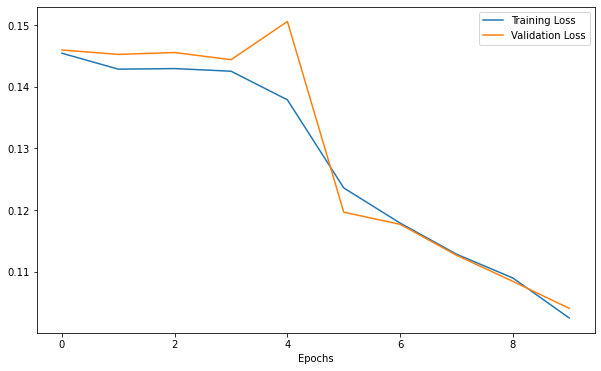

In [34]:
loss = history2.history['loss']
val_loss = history2.history['val_loss']
plt.figure(figsize=(10,6))
epochs = range(0,10)
plt.plot(epochs,loss,label='Training Loss')
plt.plot(epochs,val_loss,label='Validation Loss')
plt.xlabel('Epochs')
plt.legend()

In [35]:
rnn_scores = model_rnn1.evaluate(X_test, y_test)


32/32 [==============================] - 0s 1ms/step - loss: 0.1061 - mean_absolute_percentage_error: 218.0540


## c. Simple RNN with one hidden layer and one output layer.

In [36]:
model_rnn2 = Sequential([
    SimpleRNN(20,return_sequences=True,input_shape=[None,1]),
    SimpleRNN(20,return_sequences=True),
    Dense(1)
])

model_rnn2.compile(optimizer='adam',loss='mean_squared_error',metrics=['mean_absolute_error'])



In [37]:
history3 = model_rnn2.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
219/219 [==============================] - 3s 7ms/step - loss: 0.1471 - mean_absolute_error: 0.3298 - val_loss: 0.1440 - val_mean_absolute_error: 0.3250
Epoch 2/10
219/219 [==============================] - 1s 6ms/step - loss: 0.1365 - mean_absolute_error: 0.3159 - val_loss: 0.1355 - val_mean_absolute_error: 0.3123
Epoch 3/10
219/219 [==============================] - 1s 6ms/step - loss: 0.1237 - mean_absolute_error: 0.2955 - val_loss: 0.1201 - val_mean_absolute_error: 0.2920
Epoch 4/10
219/219 [==============================] - 1s 6ms/step - loss: 0.1121 - mean_absolute_error: 0.2773 - val_loss: 0.1092 - val_mean_absolute_error: 0.2710
Epoch 5/10
219/219 [==============================] - 1s 6ms/step - loss: 0.1029 - mean_absolute_error: 0.2632 - val_loss: 0.1017 - val_mean_absolute_error: 0.2602
Epoch 6/10
219/219 [==============================] - 1s 7ms/step - loss: 0.0974 - mean_absolute_error: 0.2546 - val_loss: 0.0988 - val_mean_absolute_error: 0.2580
Epoch 7/10
219/2

In [38]:
rnn_scores = model_rnn2.evaluate(X_test, y_test)


32/32 [==============================] - 0s 2ms/step - loss: 0.0900 - mean_absolute_error: 0.2431


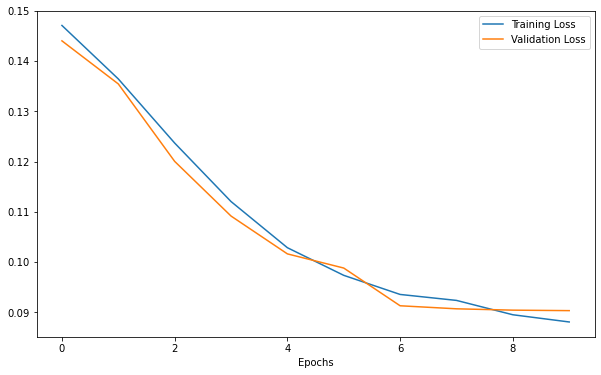

In [39]:
loss = history3.history['loss']
val_loss = history3.history['val_loss']
plt.figure(figsize=(10,6))
epochs = range(0,10)
plt.plot(epochs,loss,label='Training Loss')
plt.plot(epochs,val_loss,label='Validation Loss')
plt.xlabel('Epochs')
plt.legend()

## d. Simple RNN with two hidden layers and one output layer.

In [40]:
model_rnn3 = Sequential([
    SimpleRNN(20,return_sequences=True,input_shape=[None,1]),
    SimpleRNN(20,return_sequences=True),
    SimpleRNN(20,return_sequences=True),
    Dense(1)
])

In [41]:
model_rnn3.compile(optimizer='adam',loss='mean_squared_error',metrics=['mean_absolute_error'])

In [42]:
history4=model_rnn3.fit(X_train,y_train,epochs=10,validation_data=(X_val,y_val))

Epoch 1/10
219/219 [==============================] - 4s 10ms/step - loss: 0.1500 - mean_absolute_error: 0.3320 - val_loss: 0.1417 - val_mean_absolute_error: 0.3232
Epoch 2/10
219/219 [==============================] - 2s 9ms/step - loss: 0.1204 - mean_absolute_error: 0.2902 - val_loss: 0.1117 - val_mean_absolute_error: 0.2768
Epoch 3/10
219/219 [==============================] - 2s 9ms/step - loss: 0.1019 - mean_absolute_error: 0.2618 - val_loss: 0.1007 - val_mean_absolute_error: 0.2584
Epoch 4/10
219/219 [==============================] - 2s 9ms/step - loss: 0.0957 - mean_absolute_error: 0.2519 - val_loss: 0.0937 - val_mean_absolute_error: 0.2483
Epoch 5/10
219/219 [==============================] - 2s 8ms/step - loss: 0.0905 - mean_absolute_error: 0.2442 - val_loss: 0.0914 - val_mean_absolute_error: 0.2451
Epoch 6/10
219/219 [==============================] - 2s 9ms/step - loss: 0.0870 - mean_absolute_error: 0.2387 - val_loss: 0.0874 - val_mean_absolute_error: 0.2381
Epoch 7/10
219/

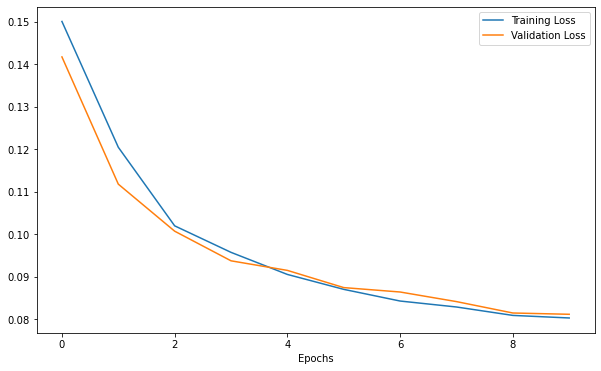

In [43]:
loss = history4.history['loss']
val_loss = history4.history['val_loss']
plt.figure(figsize=(10,6))
epochs = range(0,10)
plt.plot(epochs,loss,label='Training Loss')
plt.plot(epochs,val_loss,label='Validation Loss')
plt.xlabel('Epochs')
plt.legend()